In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [3]:
df.shape

(9912, 14)

In [4]:
clean_df=df.loc[(df.Pawpularity>4) & (df.Pawpularity<100)]
clean_df.shape

(9417, 14)

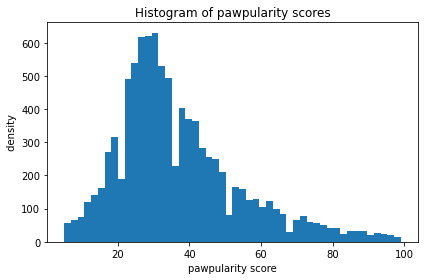

In [5]:
num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(clean_df.Pawpularity, num_bins, density=False)

ax.set_xlabel('pawpularity score')
ax.set_ylabel(' density ')
ax.set_title(r'Histogram of pawpularity scores')


# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# Check for the degree of skewdness

· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed

In [6]:
#our data is highly skewed
clean_df.Pawpularity.skew()

1.0488058225244772

In [7]:
clean_df.Pawpularity.transform(np.sqrt).skew()

0.3838462902844995

In [8]:
sk = {'square root':clean_df.Pawpularity.transform(np.sqrt).skew(),
      'logarithmic':clean_df.Pawpularity.transform(np.log).skew(),
      'reciprocal':clean_df.Pawpularity.transform(np.reciprocal).skew()}

sk

{'square root': 0.3838462902844995,
 'logarithmic': -0.4796782457330679,
 'reciprocal': 0}

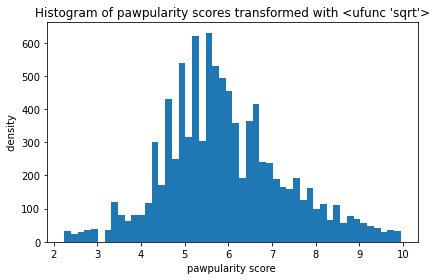

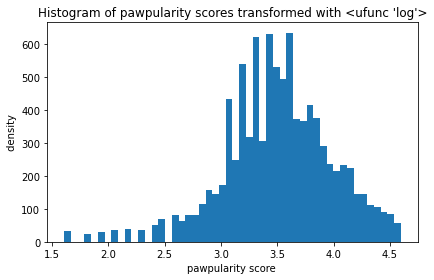

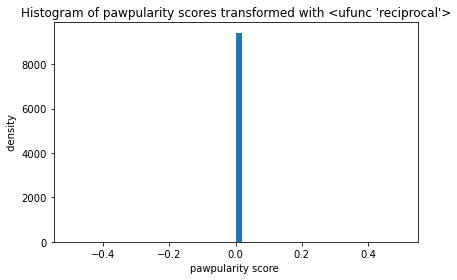

In [9]:
transform=[np.sqrt, np.log, np.reciprocal]
for i in transform:
    num_bins = 50

    fig, ax = plt.subplots()

    # the histogram of the data
    n, bins, patches = ax.hist(clean_df.Pawpularity.transform(i), num_bins, density=False)

    ax.set_xlabel('pawpularity score ')
    ax.set_ylabel(' density ')
    ax.set_title(r'Histogram of pawpularity scores transformed with {}'.format(str(i)))


    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

As you can see square transforming with the data with square root function gives a better bell curve.

In [10]:
clean_df['sqrt_tranformed score']= clean_df.Pawpularity.transform(np.sqrt)

<ipython-input-10-a311589f6294>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['sqrt_tranformed score']= clean_df.Pawpularity.transform(np.sqrt)


In [11]:
clean_df.iloc[5463]

Id                       9580a39161c4d02cc66794200cf99b58
Subject Focus                                           0
Eyes                                                    0
Face                                                    1
Near                                                    0
Action                                                  0
Accessory                                               1
Group                                                   0
Collage                                                 0
Human                                                   0
Occlusion                                               0
Info                                                    0
Blur                                                    0
Pawpularity                                            40
sqrt_tranformed score                             6.32456
Name: 5770, dtype: object

# split the dataset in to training and validation set

In [24]:
clean_df=clean_df.drop('Pawpularity',axis=1)
X = clean_df.drop('sqrt_tranformed score',axis=1)
y = clean_df['sqrt_tranformed score']

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    train_size=0.9, 
                                                    random_state=100,
                                                    stratify=y)

In [29]:
print(X_train.shape)
print(X_val.shape)


(8475, 13)
(942, 13)


In [36]:
X_train

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
5463,8cc110af9fa47a4722411c775e09f2e0,0,1,1,1,0,0,0,0,0,1,0,0
7981,cea6de0575e30fb38d2ce481ec309cfe,0,0,1,1,0,0,0,0,0,0,0,0
379,0a179efafacf11d83cea823dfedc773e,1,1,1,1,0,0,0,0,0,0,0,0
8217,d4eb73fcebde30f2210a8b1a0f8796cb,0,1,1,0,0,0,1,0,0,0,0,0
4700,78de7e6e09bec460ce89e6a49e6da509,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,74179c3f0a8efb4a2ccec5951c96917f,0,1,1,1,0,0,0,0,1,1,0,0
117,0365920c849af714930d75e7727c5165,0,1,1,1,0,1,0,0,0,0,0,0
5813,9672c1a2525baf25ade9b71429fb5f46,0,1,1,0,0,0,0,0,0,0,0,0
5608,906deaa929c916cca8160e82856aed5b,0,1,1,1,0,1,0,0,1,0,0,0


In [35]:
y_train

5463    3.464102
7981    6.855655
379     4.898979
8217    4.795832
4700    7.681146
          ...   
4544    5.477226
117     6.782330
5813    9.055385
5608    5.916080
96      7.000000
Name: sqrt_tranformed score, Length: 8475, dtype: float64

# join X_train and y_train

In [30]:
training_split=X_train.join(y_train)

In [34]:
#check to see if it joined properly
l=[]
for (i, j) in zip(X_train.index, y_train.index):
    if i == j:
        l.append(True)
    else:
        l.append(False) 
if all(l) == True:
    print('All the indexes matches perfectley  😊😌🤗👍')
else:
    print("Sorry the inexes don't match ☹️")
    

All the indexes matches perfectley  😊😌🤗👍


In [32]:
training_split.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,sqrt_tranformed score
5463,8cc110af9fa47a4722411c775e09f2e0,0,1,1,1,0,0,0,0,0,1,0,0,3.464102
7981,cea6de0575e30fb38d2ce481ec309cfe,0,0,1,1,0,0,0,0,0,0,0,0,6.855655
379,0a179efafacf11d83cea823dfedc773e,1,1,1,1,0,0,0,0,0,0,0,0,4.898979
8217,d4eb73fcebde30f2210a8b1a0f8796cb,0,1,1,0,0,0,1,0,0,0,0,0,4.795832
4700,78de7e6e09bec460ce89e6a49e6da509,0,1,1,0,0,0,0,0,0,0,0,0,7.681146


In [38]:
#save the data
training_split.to_csv('clean_training_split')
X_val.to_csv('validation_data')
y_val.to_csv('y_val')